# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Titanic Dataset Exploratory Data analysis</p>
<img src="https://wallpapercave.com/wp/8OJhYbl.jpg" style="display: block; margin: 0 auto;">

**The objective of this study is to analyze the Titanic dataset to identify and understand the factors influencing survival outcomes among passengers.**

- Investigate the impact of gender, age group, passenger class, and travel companionship on survival probabilities.
- bIdentify potential patterns or trends in survival outcomes across different demographic and socio-economic groups.
- Explore the underlying factors contributing to disparities in survival rates among passengers.
- Provide insights and recommendations for improving disaster preparedness, safety measures, and emergency response protocols in transportation systems.

**Survived:** This column indicates whether the passenger survived the Titanic disaster (1) or not (0).

**Pclass:** This column represents the passenger's socio-economic status or class, where 1 = Upper class, 2 = Middle class, and 3 = Lower class.

**Name:** This column contains the name of the passenger.

**Sex:** This column specifies the gender of the passenger, either male or female.

**Age:** This column denotes the age of the passenger. Missing values are denoted as NaN.

**SibSp:** This column indicates the number of siblings or spouses the passenger had aboard the Titanic.

**Parch:** This column indicates the number of parents or children the passenger had aboard the Titanic.

**Ticket:** This column contains the ticket number of the passenger.

**Fare:** This column represents the fare paid by the passenger.

**Embarked:** This column indicates the port of embarkation for the passenger, with C = Cherbourg, Q = Queenstown, and S = Southampton.

**Age_group:** This column appears to be a categorical grouping of ages, likely created for analysis purposes. Categories include "Adult", "Middle Age", "Seniors", etc.

### **Import Python Libraries**

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### **Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [176]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### **Understanding the Data:**

Display basic information about the dataset such as the number of rows and columns, data types, and missing values.

In [177]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [178]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [179]:
df.shape

(891, 15)

There are 891 observations and 12 variables in our dataset

In [180]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

**data.info()** shows the variables Mileage, Engine, Power, Seats, New_Price, and Price have missing values. Numeric variables like Mileage, Power are of datatype as  float64 and int64. Categorical variables like Location, Fuel_Type, Transmission, and Owner Type are of object data type

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [182]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Calculate summary statistics for numerical variables (mean, median, min, max, etc.).

In [183]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Finding The Missing Values**

**Missing Values Calculation**

isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [184]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [185]:
df.duplicated().sum()

107

### **Data Reduction or Handling Missing Values**

### **Data Cleaning:**

- Handle missing values in the dataset (e.g., impute missing values, remove rows or columns with missing values).
- Check for and handle duplicate rows, if any.
- Check for and handle outliers in numerical variables.

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column PassengerId and Cabin. have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [186]:
columns_remove = ['deck', 'embarked','alive', 'pclass']
df = df.drop(columns = columns_remove)

In [187]:
df

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,man,True,Southampton,True
887,1,female,19.0,0,0,30.0000,First,woman,False,Southampton,True
888,0,female,NaN,1,2,23.4500,Third,woman,False,Southampton,False
889,1,male,26.0,0,0,30.0000,First,man,True,Cherbourg,True


In [188]:
df.isnull().sum()

survived         0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
embark_town      2
alone            0
dtype: int64

### **Handle missing values in the dataset**

impute missing values

In [189]:
df['age'] = df['age'].fillna(round(df['age'].median()))

In [190]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [191]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [192]:
df = df.drop_duplicates()

In [193]:
df.shape

(775, 11)

We start our Feature Engineering as we need to add some columns required for analysis.

### **Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

### **Creating Features**

We will play around with the variables age in our dataset. If we see the sample data, the column “Age” shows the Age of a Person.

It would be difficult to find the Age Group if it is in year format as the Age of the car is a contributing factor to Car Price. 

Introducing a new column, “Age_group” to know the age of the car

Mapping or Replacing the values inside the Embarked column with S -> "Southampton" c -> "Cherbourg" Q -> "Queenstown"
<pre><code>df["Embarked"].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}, inplace=True)

def categorize(age):
    if age == "S":
        return "Southampton"
    elif age == "C":
        return "Cherbourg"
    else:
        return "Queenstown"
        
df["Embarked"] = df['Embarked'].apply(categorize)</code></pre>

In [194]:
def categorize(age):
    if age < 17.0:
        return 'Young'
    elif age<34.0:
        return 'Adult'
    elif age< 54.0:
        return 'Middle age'
    else:
        return 'Seniors'  

In [195]:
df['Age_group'] = df['age'].apply(categorize)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16788\625720760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_group'] = df['age'].apply(categorize)


### **Data Visulization**

Sapareting the Columns into Categorical and Numarical columns

In [196]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

print(cat_col)
print(num_col)

Index(['sex', 'who', 'embark_town', 'Age_group'], dtype='object')
['survived', 'age', 'sibsp', 'parch', 'fare']


### **EDA Univariate Analysis**

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

survived


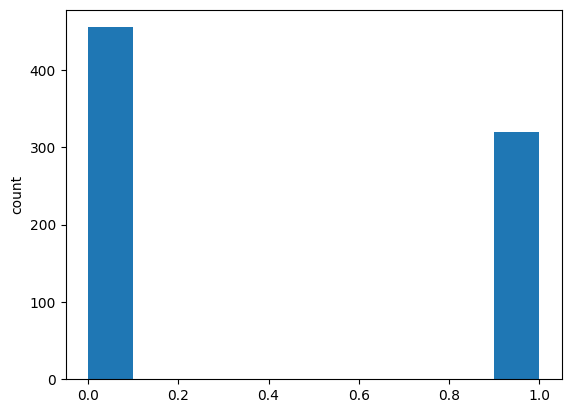

age


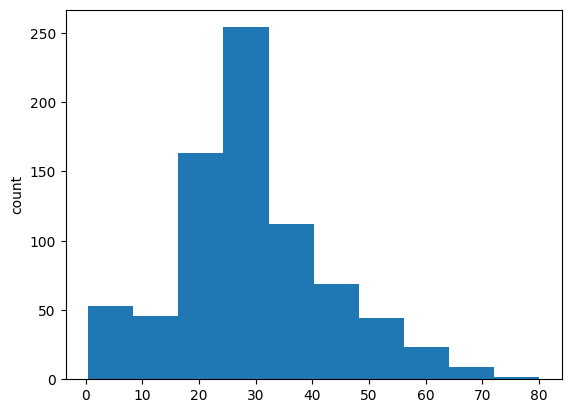

sibsp


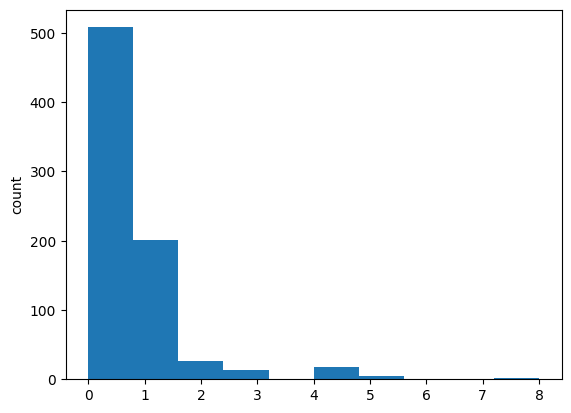

parch


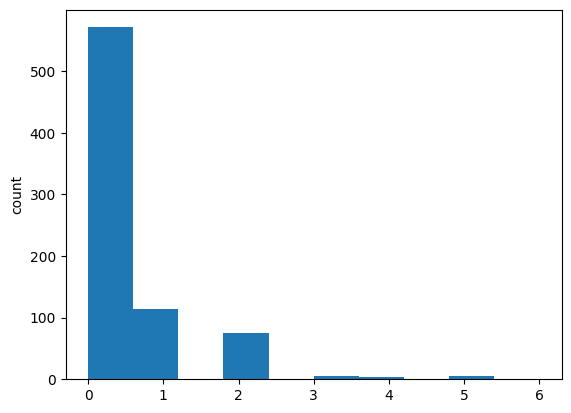

fare


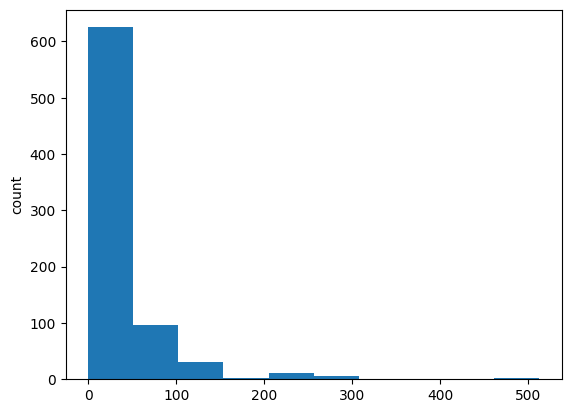

In [197]:
# Univeriate analysis
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.show()

In [198]:
df['sex'].value_counts()

sex
male      483
female    292
Name: count, dtype: int64

In [199]:
df['embark_town'].value_counts()

embark_town
Southampton    562
Cherbourg      155
Queenstown      58
Name: count, dtype: int64

In [200]:
df['Age_group'].value_counts()

Age_group
Adult         434
Middle age    193
Young          99
Seniors        49
Name: count, dtype: int64

In [201]:
df['who'].value_counts()

who
man      443
woman    250
child     82
Name: count, dtype: int64

Analyze the distribution of categorical variables using Countplot.

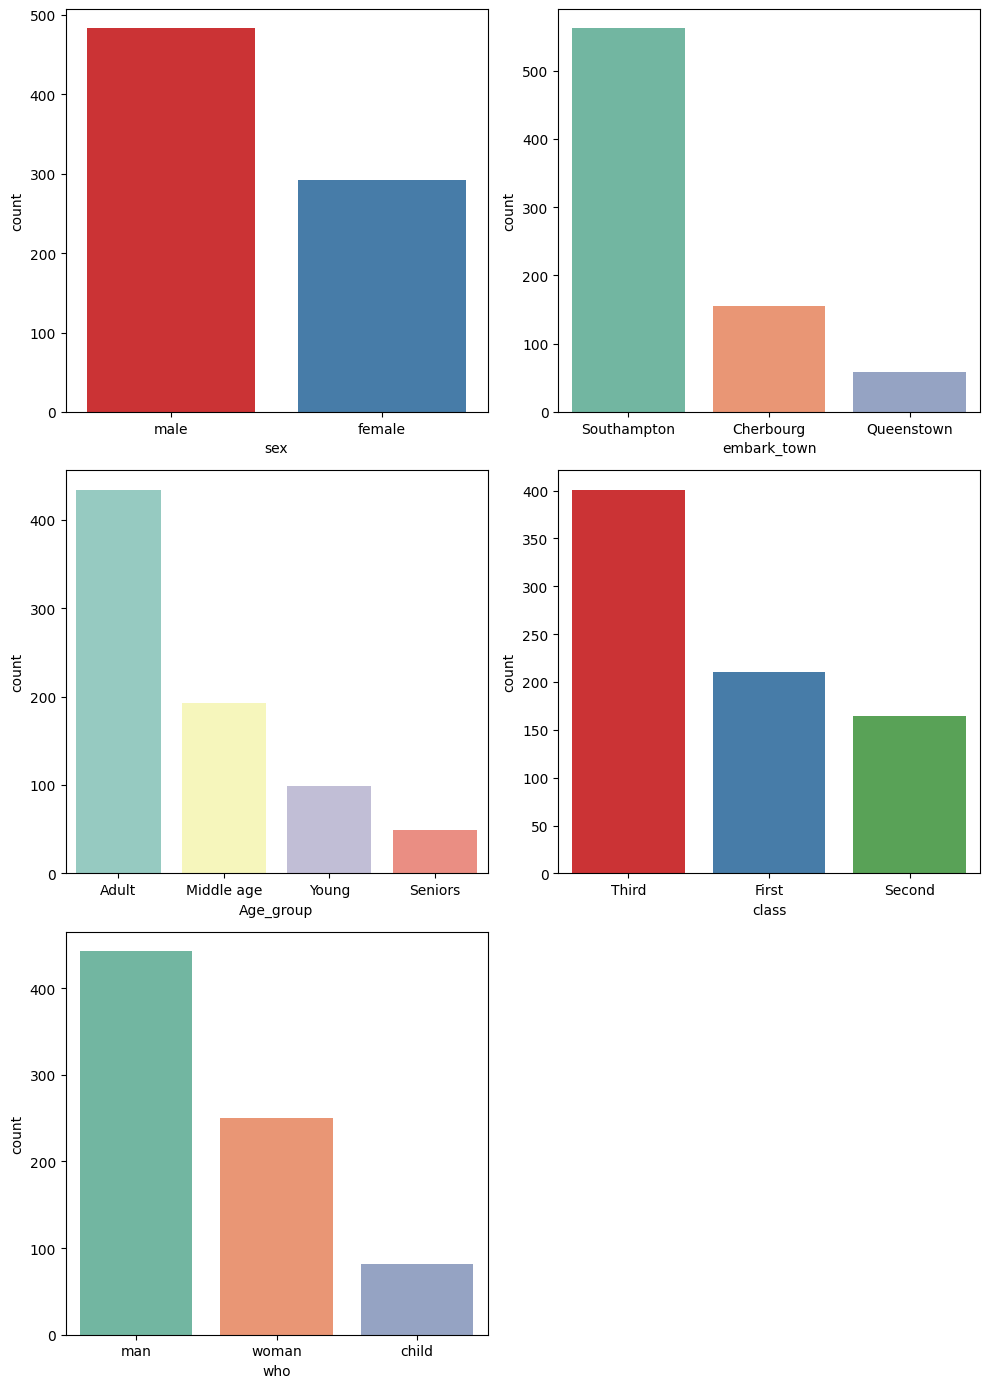

In [202]:
# Suppress the palette warning
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize= (10,14))
plt.subplot(3,2,1)
sns.countplot( x='sex', data=df, order = df['sex'].value_counts().index, palette='Set1')

plt.subplot(3,2,2)
sns.countplot( x='embark_town', data=df, order = df['embark_town'].value_counts().index, palette='Set2')

plt.subplot(3,2,3)
sns.countplot( x='Age_group', data=df, order = df['Age_group'].value_counts().index, palette='Set3')

plt.subplot(3,2,4)
sns.countplot( x='class', data=df, order = df['class'].value_counts().index, palette='Set1')

plt.subplot(3,2,5)
sns.countplot( x='who', data=df, order = df['who'].value_counts().index, palette='Set2')

plt.tight_layout()
plt.show()

### **Multivariate Analysis**

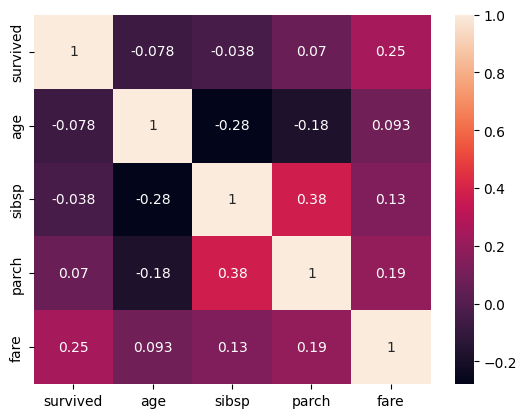

In [203]:
corr = df[num_col].corr()
sns.heatmap(corr, annot=True)
plt.show()

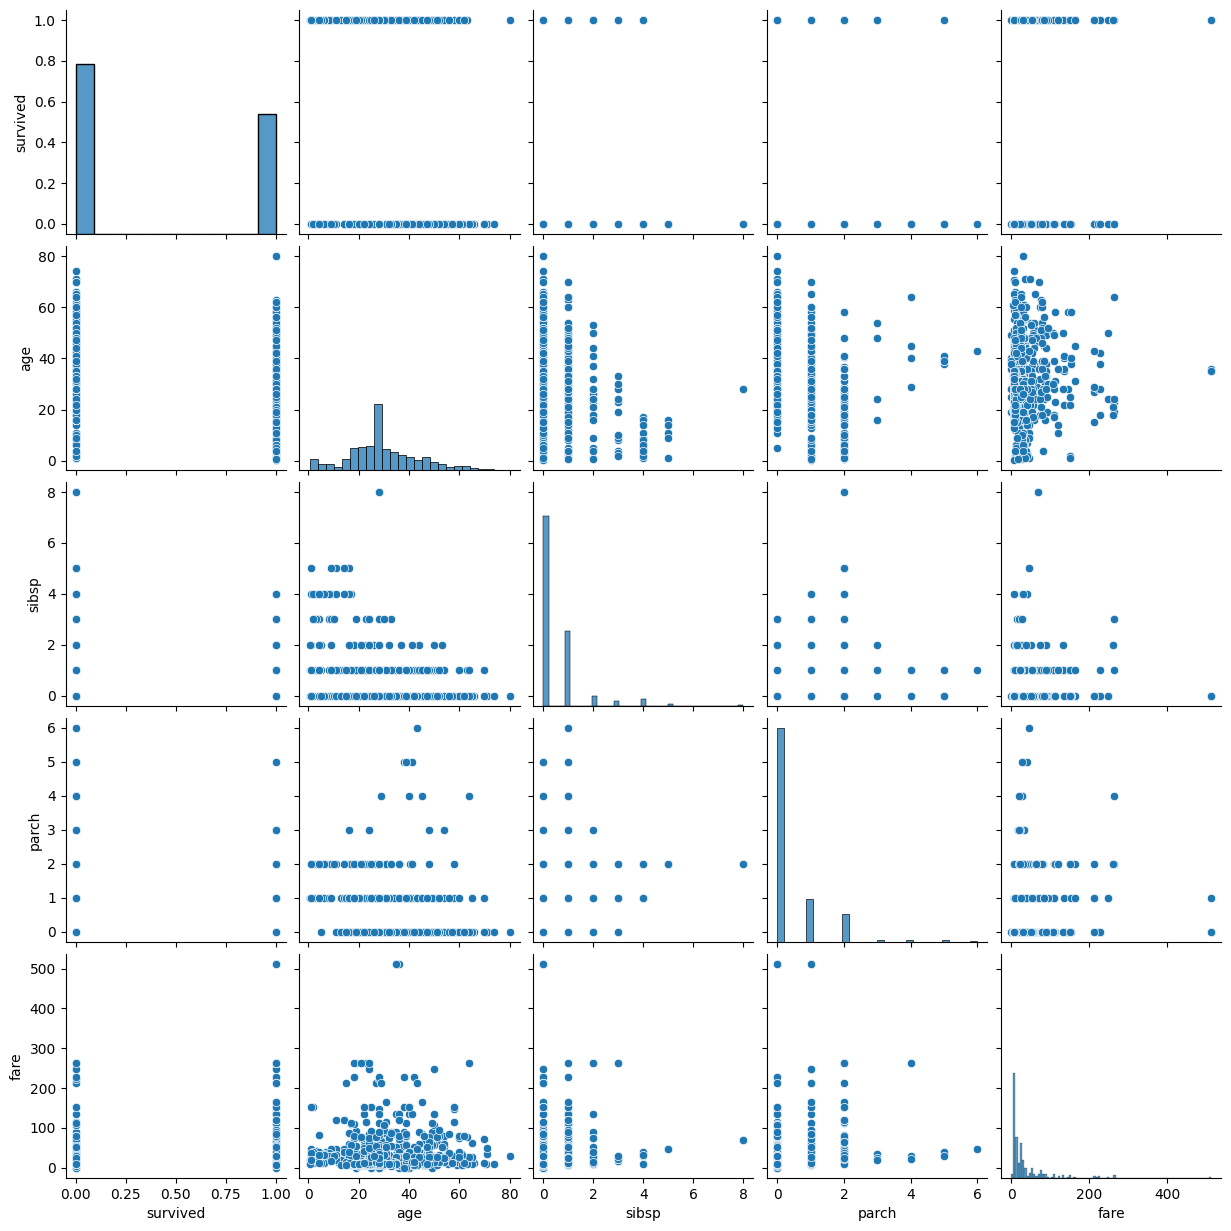

In [204]:
sns.pairplot(df.drop(['alone','adult_male'],axis=1))
plt.show()

### **EDA Bivariate Analysis**

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

Analyze relationships between multiple variables simultaneously

Use appropriate visualizations to present key findings and insights from your analysis.

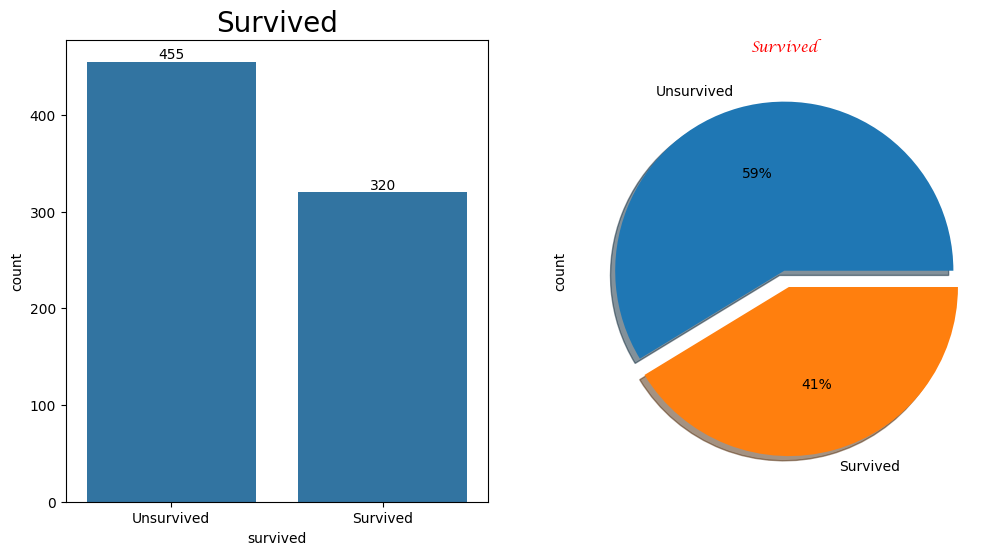

In [205]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='survived', data=df)
ax.set_xticklabels(['Unsurvived', 'Survived'])
ax.bar_label(ax.containers[0])
plt.title("Survived", fontsize=20)

ax =plt.subplot(1,2,2)
ax=df['survived'].value_counts().plot.pie(labels = ['Unsurvived','Survived'],explode=[0, 0.1],autopct='%1.f%%',shadow=True);
ax.set_title(label = "Survived", fontsize = 20,color='Red',font='Lucida Calligraphy');

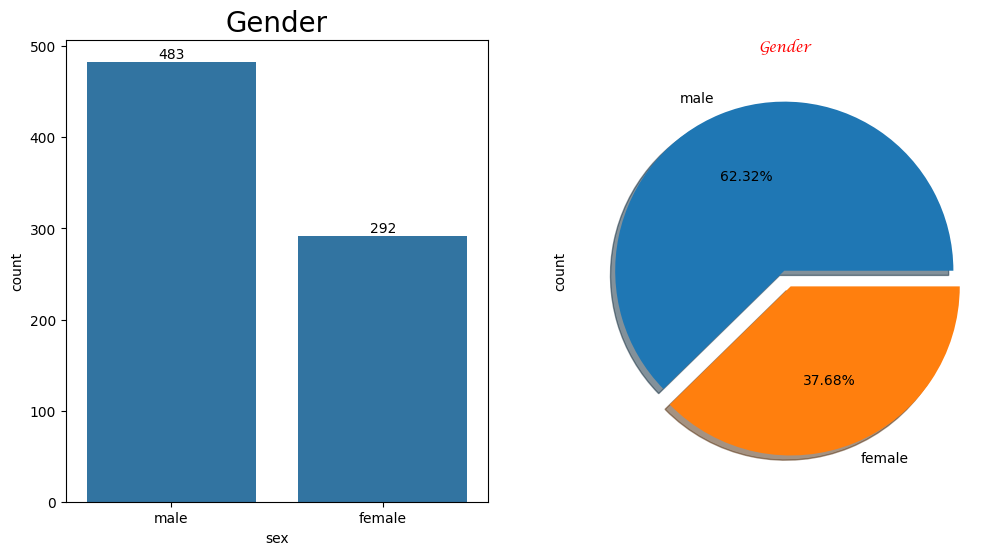

In [206]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='sex', data=df)
ax.bar_label(ax.containers[0])
plt.title("Gender", fontsize=20)
ax =plt.subplot(1,2,2)
ax=df['sex'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Gender", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [207]:
df.groupby('sex')['survived'].count()

sex
female    292
male      483
Name: survived, dtype: int64

In [208]:
df.groupby('class')['survived'].count()

class
First     210
Second    164
Third     401
Name: survived, dtype: int64

In [209]:
df.groupby('who')['survived'].count()

who
child     82
man      443
woman    250
Name: survived, dtype: int64

In [210]:
df.groupby('adult_male')['survived'].count()

adult_male
False    332
True     443
Name: survived, dtype: int64

In [211]:
df.groupby('embark_town')['survived'].count()

embark_town
Cherbourg      155
Queenstown      58
Southampton    562
Name: survived, dtype: int64

In [212]:
df.groupby('alone')['survived'].count()

alone
False    338
True     437
Name: survived, dtype: int64

In [213]:
df.groupby('sibsp')['survived'].count()

sibsp
0    508
1    201
2     27
3     14
4     18
5      5
8      2
Name: survived, dtype: int64

In [214]:
df.groupby('parch')['survived'].count()

parch
0    571
1    114
2     75
3      5
4      4
5      5
6      1
Name: survived, dtype: int64

In [215]:
df.groupby('Age_group')['survived'].count()

Age_group
Adult         434
Middle age    193
Seniors        49
Young          99
Name: survived, dtype: int64

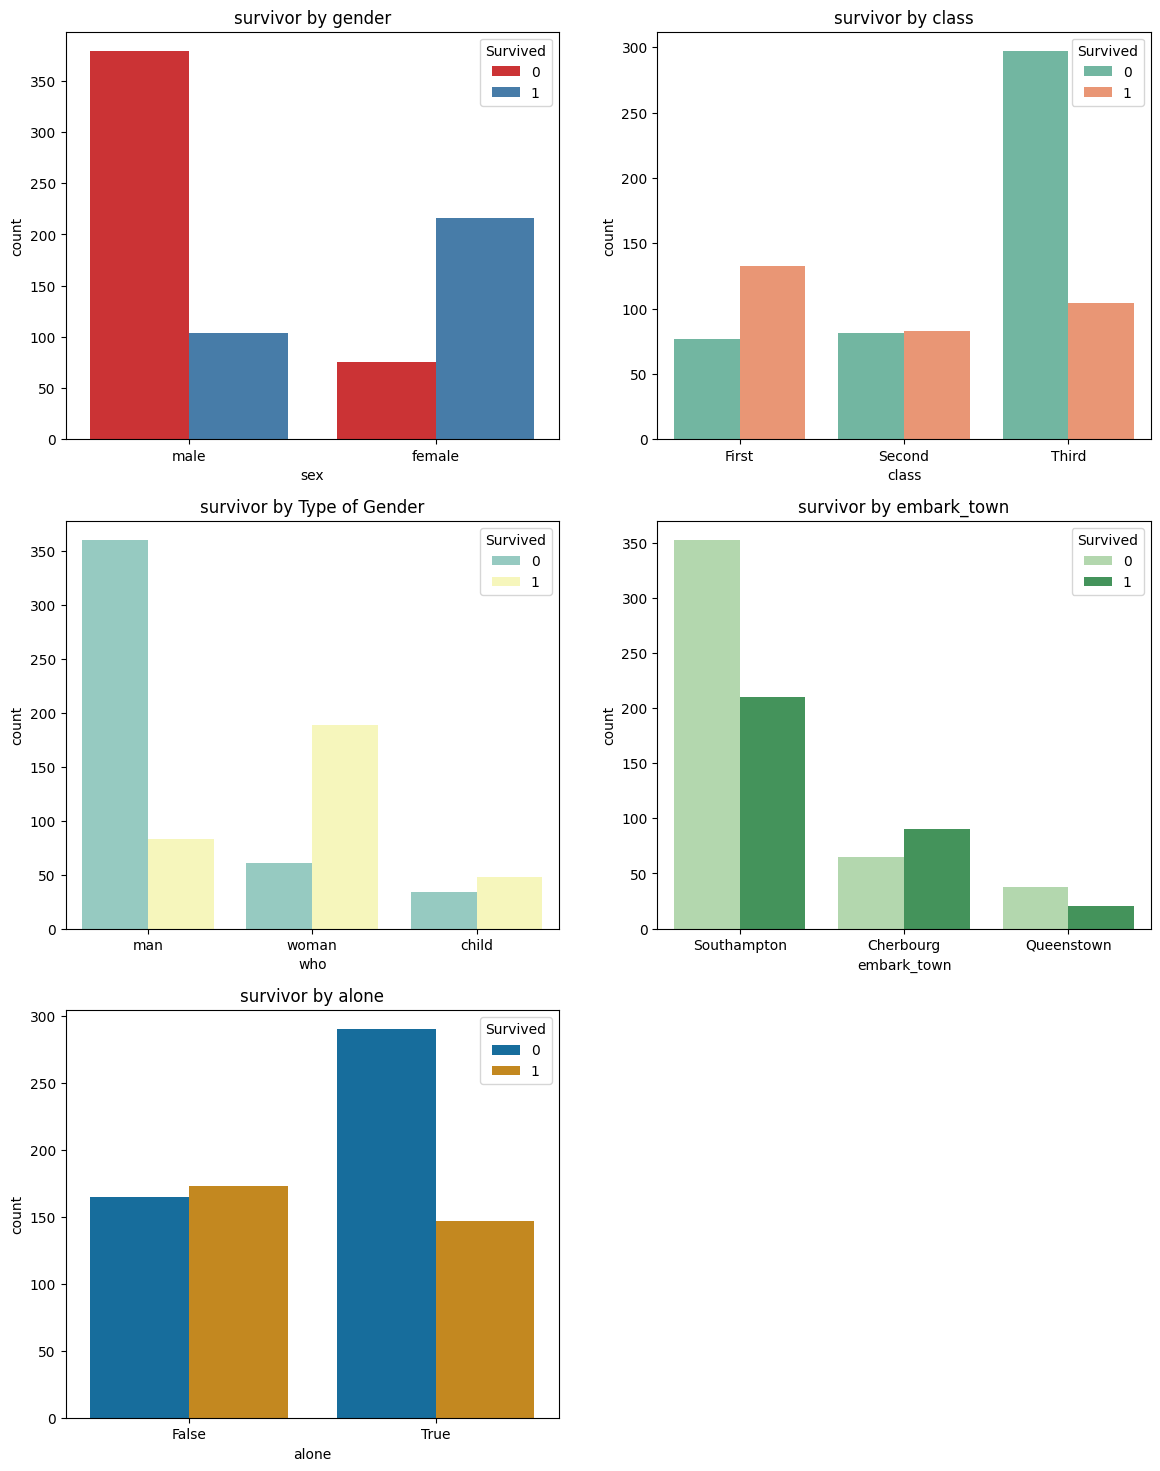

In [216]:
plt.figure(figsize=(14,18))

plt.subplot(3,2,1)
sns.countplot(x='sex', hue='survived', data=df, palette='Set1')
plt.legend(title='Survived', loc=1)#'upper right'
plt.title('survivor by gender')

plt.subplot(3,2,2)
sns.countplot(x='class', hue='survived', data=df, palette='Set2')
plt.legend(title='Survived', loc=1)#'upper right'
plt.title('survivor by class')

plt.subplot(3,2,3)
sns.countplot(x='who', hue='survived', data=df, palette='Set3')
plt.legend(title='Survived', loc=1)#'upper right'
plt.title('survivor by Type of Gender')

plt.subplot(3,2,4)
sns.countplot(x='embark_town', hue='survived', data=df, palette='Greens')
plt.legend(title='Survived', loc=1)#'upper right'
plt.title('survivor by embark_town')

plt.subplot(3,2,5)
sns.countplot(x='alone', hue='survived', data=df, palette='colorblind')
plt.legend(title='Survived', loc=1)#'upper right'
plt.title('survivor by alone')

plt.show()

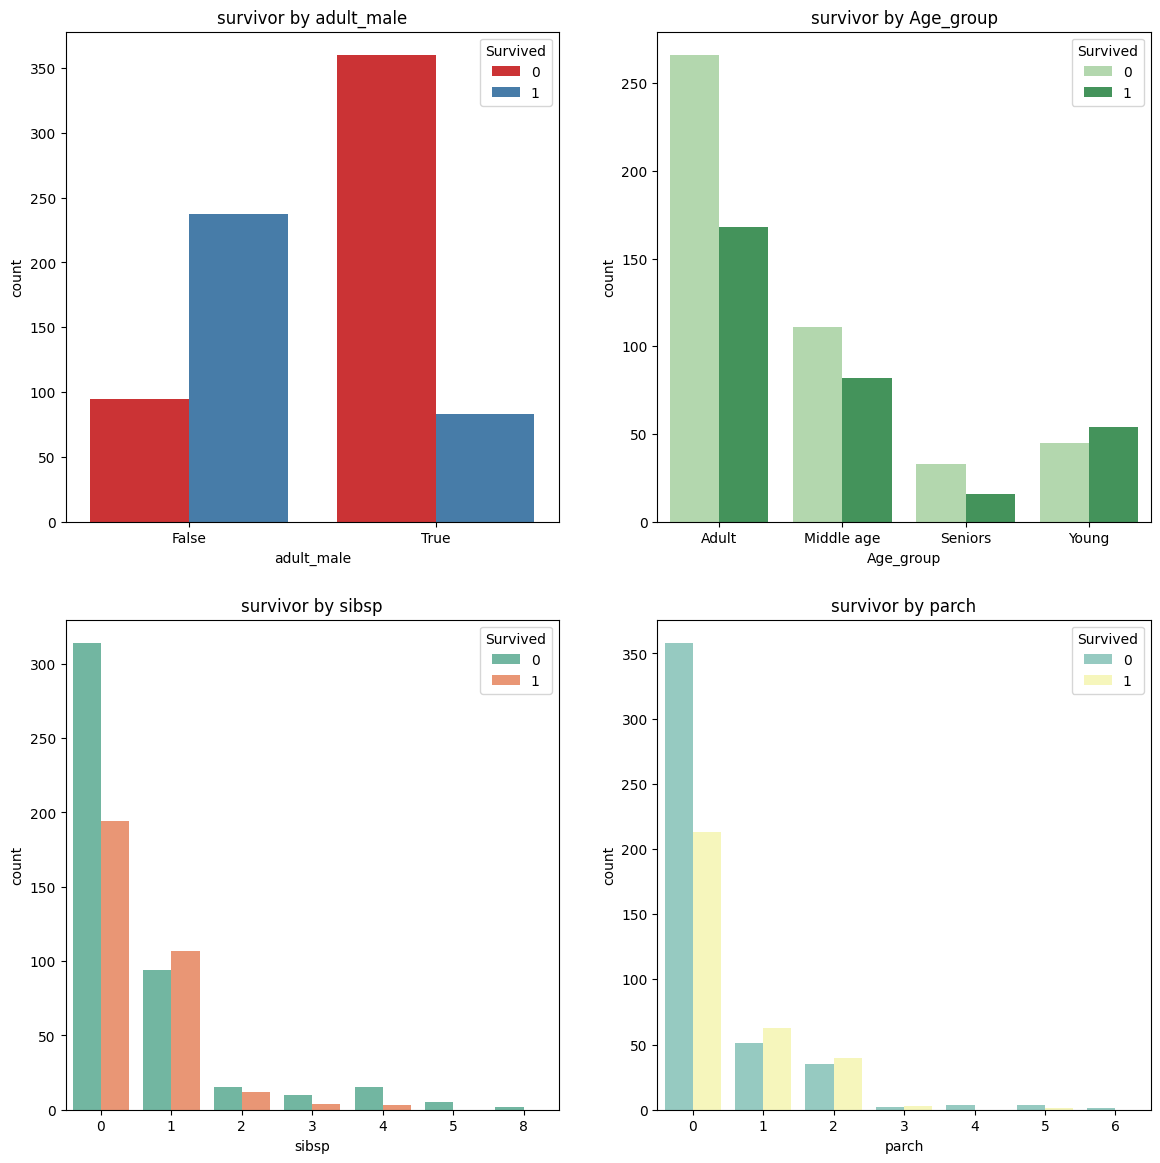

In [217]:
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
sns.countplot(x='adult_male', hue='survived', data=df, palette='Set1')
plt.legend(title='Survived', loc=1)#'upper right'
plt.title('survivor by adult_male')

plt.subplot(2,2,2)
sns.countplot(x='Age_group', hue='survived', data=df, palette='Greens')
plt.legend(title='Survived', loc=1)
plt.title('survivor by Age_group')

plt.subplot(2,2,3)
sns.countplot(x='sibsp', hue='survived', data=df, palette='Set2')
plt.legend(title='Survived', loc=1)#'upper right'
plt.title('survivor by sibsp')

plt.subplot(2,2,4)
sns.countplot(x='parch', hue='survived', data=df, palette='Set3')
plt.legend(title='Survived', loc=1)
plt.title('survivor by parch')

plt.show()


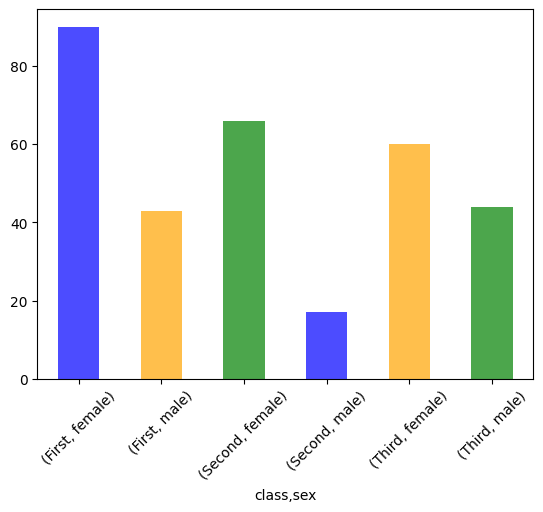

In [218]:
survival_rate_by_class_gender = df.groupby(['class', 'sex'])['survived'].sum()
survival_rate_by_class_gender.plot(kind='bar', color = ['blue', 'orange', 'green'], alpha = 0.7)
plt.xticks(rotation=45)
plt.show()

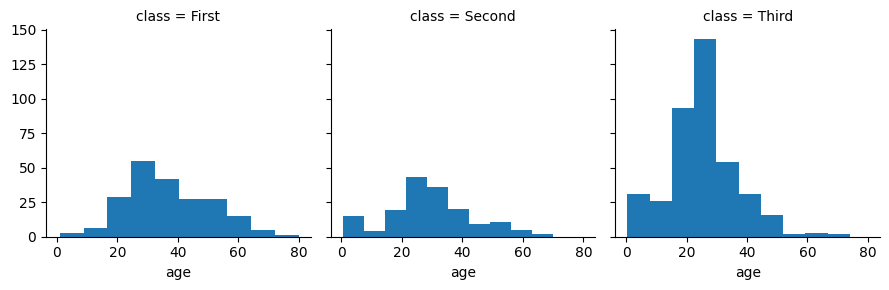

In [219]:
cla = sns.FacetGrid(data = df, col='class')
cla = cla.map(plt.hist, 'age')

### **Obsevation**

- the dataset shows thet the survival rate is 62%indicating that the majoriy of passengersarenot survive the titanic disaster
- Young passengers are survived compared to other agre group
- female passengers are survived comparedmale passengers
- travel with companionship are survied more 
- first class passengers are alived morethan other class

**Survival Rate:** The dataset shows that the survival rate is 62%, indicating that the majority of passengers did not survive the Titanic disaster.

**Gender Disparity:** Among the passengers, males had a higher mortality rate compared to females, with 65% of males not surviving compared to 35% of females.

**Age Group Disparity:** Analysis based on age groups reveals that adults had the highest number of casualties, followed by middle-aged individuals. Conversely, young passengers had a higher likelihood of survival compared to other age groups. Seniors also faced high mortality rates.

**Gender Disparity Across Survival:** While males experienced higher casualties overall, females exhibited a higher survival rate, indicating that gender played a significant role in determining survival outcomes.

**Class Disparity:** Passengers in first class had the highest survival rate, followed by those in second class. However, passengers in third class faced the highest mortality rate, with a notable peak in casualties.

**Sibling/Spouse Disparity:** Passengers traveling with no siblings or spouse had a higher chance of survival compared to those traveling with one or more siblings or spouse.

### **Conclusion:**

The analysis of the Titanic dataset highlights significant disparities in survival outcomes based on gender, age group, passenger class, and travel companionship. Females and young individuals were more likely to survive, while males, adults, and passengers in lower-class accommodations faced higher mortality rates. These findings underscore the complex dynamics of disaster response and the impact of socio-demographic factors on survival probabilities. Further investigation into the underlying factors driving these disparities may provide valuable insights into historical events and inform future disaster preparedness efforts.